Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00322_115.jpg
Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00317_26.jpg
Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00359_97.jpg
Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00123_13.jpg
Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00303_85.jpg
Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00270_11.jpg
Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00240_144.jpg
Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00273_109.jpg
Saved processed image to: /home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE/00169_127.jpg
Saved processed image to: /home/under1/Det

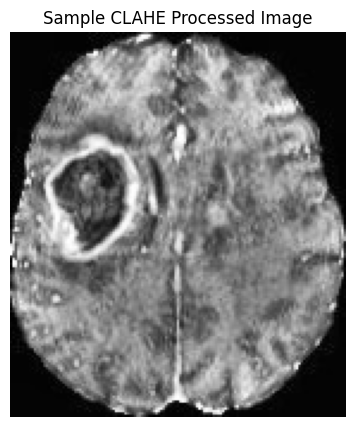

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

def apply_clahe_to_image(image_path, output_path, clip_limit=3.0, tile_grid_size=(8, 8)):
    # 이미지 읽기 (이미지를 RGB로 읽음)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: 이미지 파일을 읽을 수 없습니다: {image_path}")
        return False

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV의 기본 BGR을 RGB로 변환

    # RGB에서 YUV 색 공간으로 변환
    img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

    # CLAHE 객체 생성 및 적용
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])  # Y 채널에 CLAHE 적용

    # 다시 RGB 색 공간으로 변환
    img_clahe_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

    # CLAHE 적용 이미지를 파일로 저장
    success = cv2.imwrite(output_path, cv2.cvtColor(img_clahe_rgb, cv2.COLOR_RGB2BGR))
    if success:
        print(f"Saved processed image to: {output_path}")
    else:
        print(f"Error: Failed to save image to: {output_path}")
    return success

# 폴더 경로 설정
input_images_folder = '/home/under1/Detect/jeongui/axial/crop/images/val'
input_labels_folder = '/home/under1/Detect/jeongui/axial/crop/labels/val'
output_images_folder = '/home/under1/Detect/jeongui/axial/crop_CLAHE/images/val_crop_CLAHE'
output_labels_folder = '/home/under1/Detect/jeongui/axial/crop_CLAHE/labels/val_crop_CLAHE'

# 출력 폴더가 존재하지 않으면 생성
os.makedirs(output_images_folder, exist_ok=True)
os.makedirs(output_labels_folder, exist_ok=True)

# 이미지 파일에 CLAHE 적용
processed_images = []
for root, dirs, files in os.walk(input_images_folder):
    for filename in files:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            input_image_path = os.path.join(root, filename)
            relative_path = os.path.relpath(input_image_path, input_images_folder)
            output_image_path = os.path.join(output_images_folder, relative_path)
            
            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
            
            # CLAHE 적용
            if apply_clahe_to_image(input_image_path, output_image_path):
                processed_images.append(output_image_path)

# 라벨 파일 복사
label_files = [f for f in os.listdir(input_labels_folder) if f.endswith('.txt')]

for label_file in label_files:
    input_label_path = os.path.join(input_labels_folder, label_file)
    output_label_path = os.path.join(output_labels_folder, label_file)
    shutil.copy(input_label_path, output_label_path)
    
# 결과 이미지 디스플레이 (예시로 첫 번째 이미지를 표시)
if processed_images:
    sample_image = processed_images[0]
    img_sample = cv2.imread(sample_image)
    img_sample_rgb = cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.imshow(img_sample_rgb)
    plt.axis('off')
    plt.title('Sample CLAHE Processed Image')
    plt.show()
else:
    print("Error: No processed images found in the output folder.")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기 (이미지를 RGB로 읽음)
img = cv2.imread('./00095_188.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV의 기본 BGR을 RGB로 변환

# RGB에서 YUV 색 공간으로 변환
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

# CLAHE 객체 생성 및 적용
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4, 4)) #클립 한계를 3.0, 타일 그리드 크기를 (8,8)로 설정
img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])  # Y 채널에 CLAHE 적용

# 다시 RGB 색 공간으로 변환
img_clahe_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

# CLAHE 적용 이미지를 파일로 저장
cv2.imwrite('/mnt/data/image_clahe.png', cv2.cvtColor(img_clahe_rgb, cv2.COLOR_RGB2BGR))

# 이미지 디스플레이 (matplotlib 사용)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Before')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE')
plt.imshow(img_clahe_rgb)
plt.axis('off')

plt.show()


In [4]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread('00018_101.jpg')

# 픽셀 값 확인
print("전체 픽셀 값:")
print(image)

전체 픽셀 값:
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [5]:
print(f"최댓값: {image.max()}")
print(f"평균값: {image.mean()}")

최댓값: 255
평균값: 15.579940795898438


In [7]:

import cv2
import numpy as np

# 이미지 로드 (흑백 이미지)
image_path = '00018_101.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 제대로 로드되었는지 확인
if image is None:
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다: {image_path}")

# 0도 아니고 1도 아닌 픽셀 값 확인
non_zero_non_one_pixels = image[(image != 0) & (image != 1)]

print("0도 아니고 1도 아닌 픽셀 값:")
print(non_zero_non_one_pixels)
print("0도 아니고 1도 아닌 픽셀의 개수:", len(non_zero_non_one_pixels))


0도 아니고 1도 아닌 픽셀 값:
[2 2 2 ... 3 3 2]
0도 아니고 1도 아닌 픽셀의 개수: 17722


In [11]:
# 정규화
import os
import cv2
import numpy as np

# 입력 및 출력 폴더 경로 설정
input_images_folder = './images/test'  # 입력 이미지 폴더 경로
output_images_folder = './images/axial_test_normalized'  # 출력 이미지 폴더 경로

# 출력 폴더가 존재하지 않으면 생성
os.makedirs(output_images_folder, exist_ok=True)

# 입력 폴더 내 모든 파일에 대해 정규화 작업 수행
for filename in os.listdir(input_images_folder):
    if filename.endswith((".jpg", ".png", ".jpeg", ".bmp")):  # 이미지 파일 형식만 처리
        input_path = os.path.join(input_images_folder, filename)
        output_path = os.path.join(output_images_folder, filename.split('.')[0] + '.npy')  # 확장자를 npy로 변경
        
        # 이미지 읽기
        image = cv2.imread(input_path)
        
        # 이미지 정규화
        min_value = np.min(image)
        max_value = np.max(image)
        output = (image - min_value) / (max_value - min_value)
        
        # 정규화된 이미지 저장 (numpy 포맷)
        np.save(output_path, output)

print("모든 이미지의 정규화가 완료되었습니다.")


모든 이미지의 정규화가 완료되었습니다.


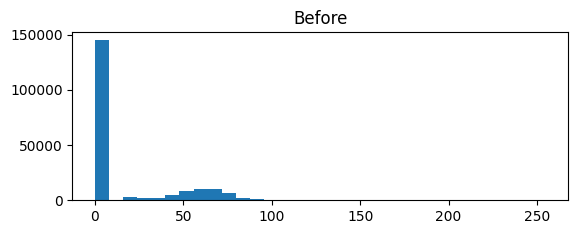

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("00018_101.jpg")

min_value = np.min(image)
max_value = np.max(image)

output = (image - min_value) / (max_value - min_value)

plt.subplot(2, 1, 1)
plt.hist(np.ravel(image), bins=32)
plt.title('Before')
#plt.subplot(2, 1, 2)
#plt.hist(np.ravel(output), bins=32)
#plt.title('After')
#plt.subplots_adjust(hspace=0.5)

plt.show()